In [1]:
from scipy.special import kl_div,rel_entr
import numpy as np
from matplotlib import pyplot as plt
import quantum_classical_2Dgamma as qc

import tensorflow as tf
from matplotlib import pyplot
from qibo import gates, hamiltonians, models, set_backend, set_threads
from matplotlib import cm
from matplotlib import pyplot as plt, colors
from matplotlib.offsetbox import AnchoredText
import pandas as pd

[Qibo 0.1.7|INFO|2022-07-03 17:37:57]: Using tensorflow backend on /device:CPU:0
[Qibo 0.1.7|WARNING|2022-07-03 17:37:57]: qibotf library was not found. `tf.einsum` will be used to apply gates. In order to install Qibo's high performance custom operators for TensorFlow please use `pip install qibotf`. Alternatively, consider installing the qibojit backend.
[Qibo 0.1.7|INFO|2022-07-03 17:37:57]: Using tensorflow backend on /device:CPU:0


In [2]:
n_layers=128
fixed_params=range(0,12,2)


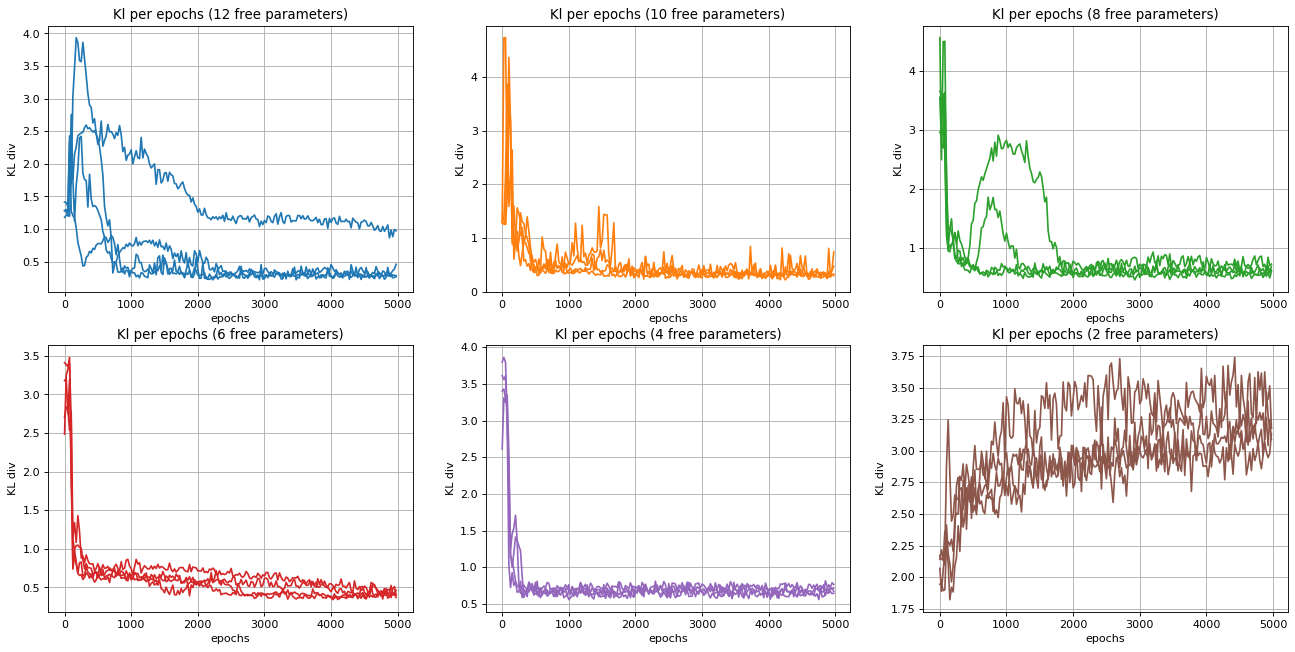

In [4]:
epochs=range(0,5000,25)
pyplot.figure(figsize=(20, 15), dpi=80)
rows=3
cols=3
pyplot.subplot(rows,cols,1)



for i, val in enumerate(fixed_params):
    pyplot.subplot(rows,cols,i+1)
    for j in range (4):
        kl=np.loadtxt(f"data/KLdiv_2Dgaussian_gamma_2_3_1_10000_{n_layers}_0.1_{val}_{j}")
        
        pyplot.plot(epochs,kl,color=f"C{i}")
    
    pyplot.title(f'Kl per epochs ({12-val} free parameters)')
    pyplot.xlabel('epochs')
    pyplot.ylabel('KL div')
    #pyplot.legend()
    pyplot.grid()

pyplot.show()

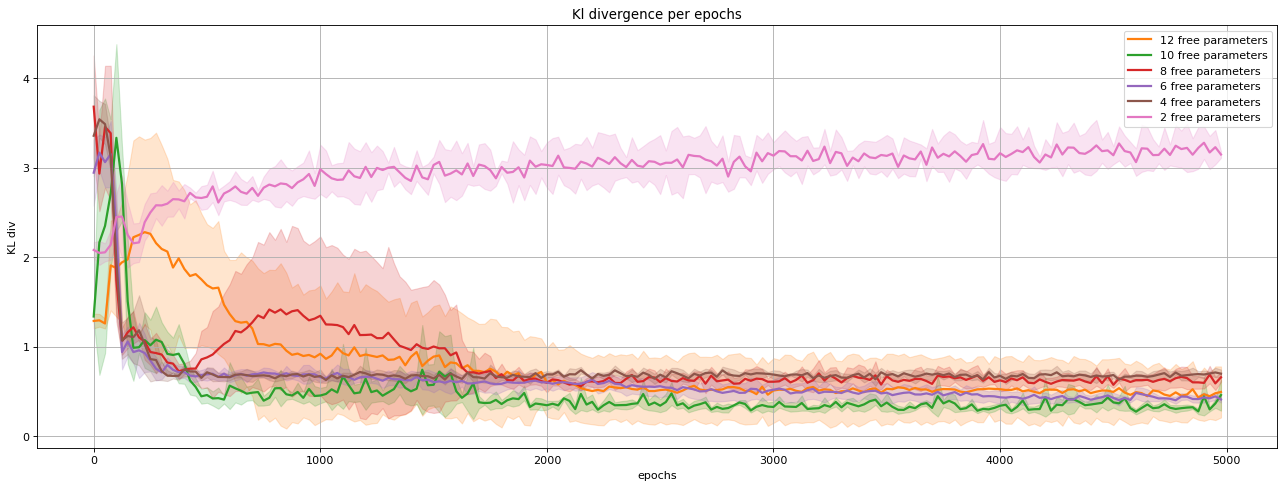

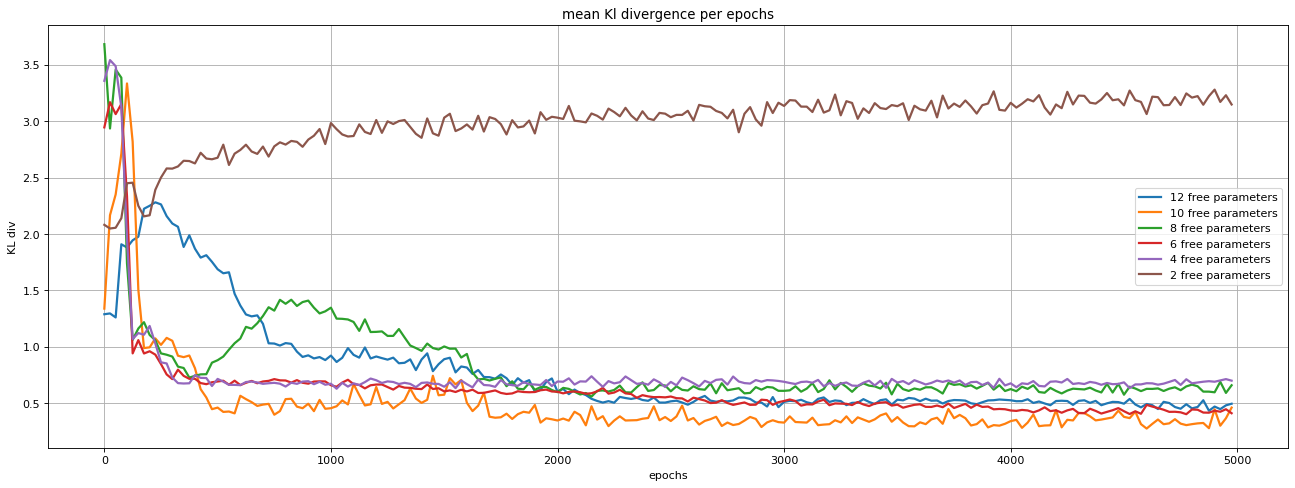

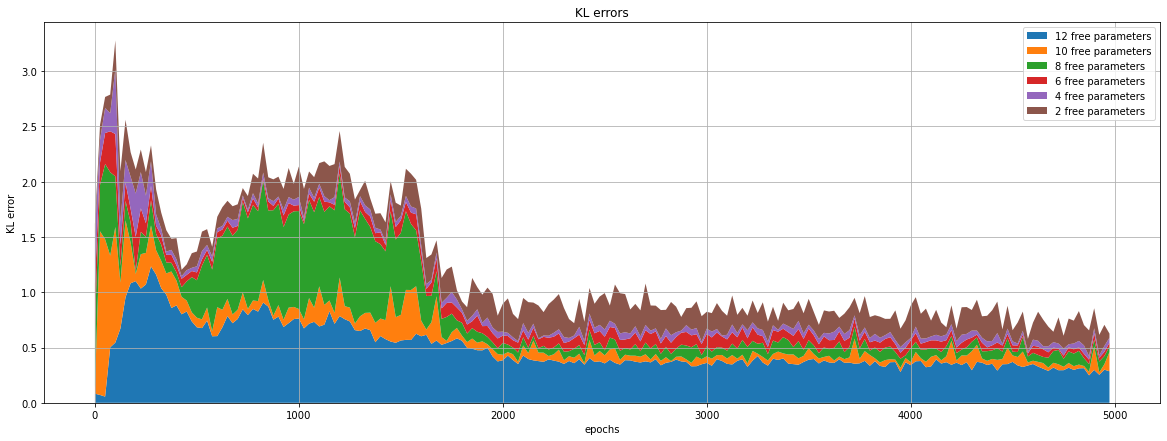

In [10]:
epochs=range(0,5000,25)
# error bars 
pyplot.figure(figsize=(20, 7), dpi=80)

kl_simple_learning=[]
errors=[]

for i, val in enumerate(fixed_params):
    
    kl_transfer_learning=[]
    for j in range (4):
        kl=np.loadtxt(f"data/KLdiv_2Dgaussian_gamma_2_3_1_10000_{n_layers}_0.1_{val}_{j}")
        kl_transfer_learning.append(kl)
    mean=np.mean(kl_transfer_learning, axis=0)  
    error=np.std(kl_transfer_learning, axis=0)
    errors.append(error)
    pyplot.plot(epochs,mean,color=f"C{i+1}",label=f'{12-val} free parameters',linewidth=2,alpha=1)
    pyplot.fill_between(epochs, mean-error, mean+error,alpha=0.2, 
                        edgecolor=f"C{i+1}", facecolor=f"C{i+1}")

pyplot.title(f'Kl divergence per epochs')
    
pyplot.xlabel('epochs')
pyplot.ylabel('KL div')
pyplot.legend()
pyplot.grid()

# plot mean

pyplot.figure(figsize=(20, 7), dpi=80)

kl_simple_learning=[]
errors=[]



for i, val in enumerate(fixed_params):
    
    kl_transfer_learning=[]
    for j in range (4):
        kl=np.loadtxt(f"data/KLdiv_2Dgaussian_gamma_2_3_1_10000_{n_layers}_0.1_{val}_{j}")
        kl_transfer_learning.append(kl)
    mean=np.mean(kl_transfer_learning, axis=0)  
    error=np.std(kl_transfer_learning, axis=0)
    errors.append(error)
    pyplot.plot(epochs,mean,color=f"C{i}",label=f'{12-val} free parameters',linewidth=2,alpha=1)

pyplot.title(f'mean Kl divergence per epochs')
    
pyplot.xlabel('epochs')
pyplot.ylabel('KL div')
pyplot.legend()
pyplot.grid()

# plot errors of KL 

fig, ax = plt.subplots(figsize=(20,7))
labels=[f'{12-val} free parameters' for val in fixed_params]

    
ax.stackplot(epochs, errors,labels=labels)
pyplot.legend()
pyplot.title("KL errors")
pyplot.xlabel("epochs")
pyplot.ylabel("KL error")
pyplot.grid()
pyplot.show()

On average the transfer learning with 10,6 and 4 fixed parameters converges further than the simple learning and they have also smaller oscillations 